In [1]:
# Import libraries and datafiles
import pandas as pd
import numpy as np
from patsy import dmatrices
import matplotlib.pyplot as plt
import warnings
%pylab inline
warnings.filterwarnings("ignore")

train = pd.read_csv("C:/Users/Jeremy/Desktop/Jobs/Companies/Dell/During Program/Final Project/Data/train.csv")
test = pd.read_csv("C:/Users/Jeremy/Desktop/Jobs/Companies/Dell/During Program/Final Project/Data/test.csv")

Populating the interactive namespace from numpy and matplotlib


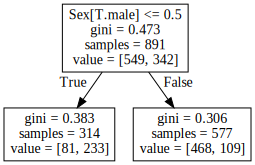

In [2]:
# Recreate the gender model
Y, X = dmatrices("Survived ~ Sex", train, return_type = "dataframe")
y = Y["Survived"].values

from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = "gini")
clf.fit(X, y)

from graphviz import Source
Source(tree.export_graphviz(clf, out_file=None, feature_names=X.columns))

In [5]:
# Build a deeper tree
Y, X = dmatrices("Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked", train, return_type = "dataframe")
y = Y["Survived"].values

clf = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 30, min_samples_split = 20, min_impurity_decrease = 0.01)
clf.fit(X, y)

Source(tree.export_graphviz(clf, out_file=None, feature_names=X.columns))

graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=X.columns))
graph.format = 'png'
graph.render('dtree',view=True)

'dtree.png'

In [4]:
# Now let's make a prediction and write a submission file
test["Survived"] = 0
Y_test, X_test = dmatrices("Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked", test, return_type = "dataframe")

Prediction = clf.predict(X_test)
submit = pd.concat([test["PassengerId"], pd.DataFrame(Prediction, columns=["Survived"])], axis = 1)
submit.to_csv("myfirstdtree_Python.csv", index = False)

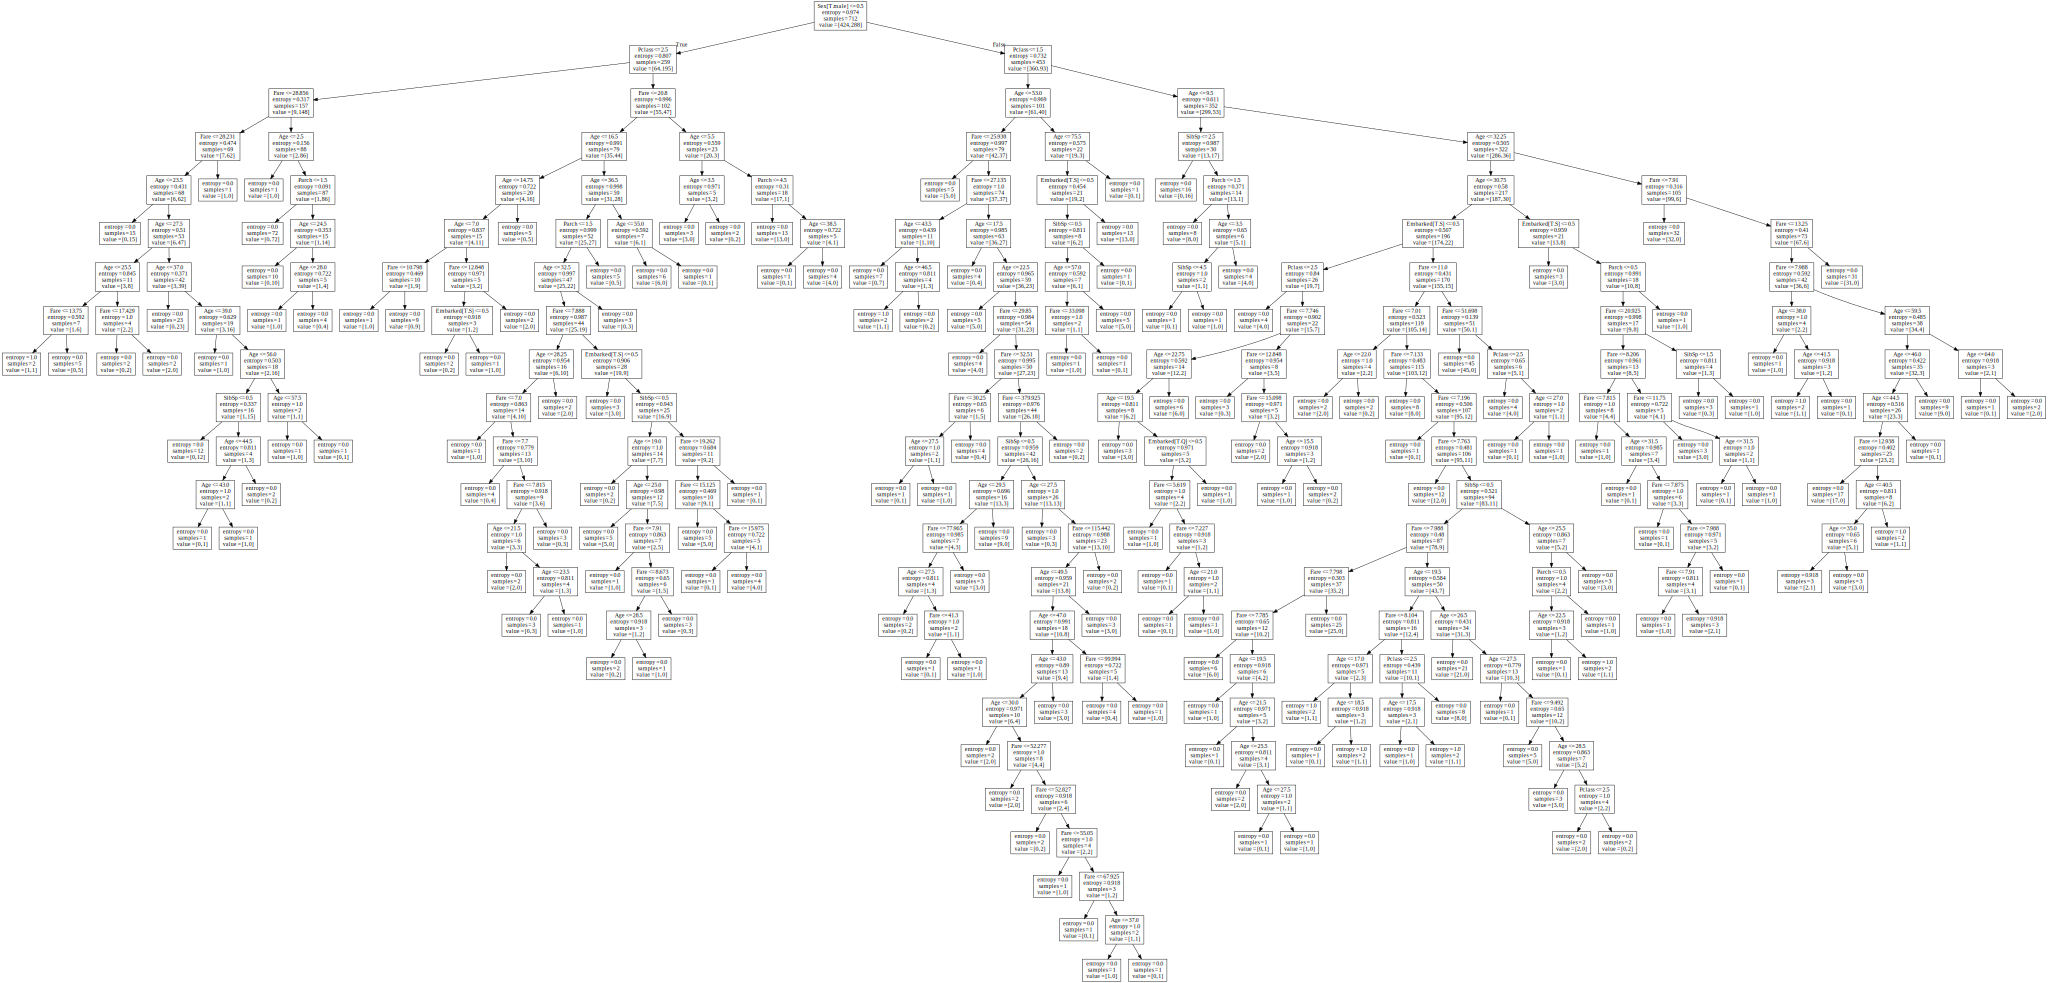

In [5]:
# Let's unleash the decision tree and let it grow to the max
Y, X = dmatrices("Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked", train, return_type = "dataframe")
y = Y["Survived"].values

clf = tree.DecisionTreeClassifier(criterion = "entropy")
clf.fit(X, y)

Source(tree.export_graphviz(clf, out_file=None, feature_names=X.columns))

In [41]:
# Now let's make a prediction and write a submission file
test["Survived"] = 0
Y_test, X_test = dmatrices("Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked", test, return_type = "dataframe")

Prediction = clf.predict(X_test)
submit = pd.concat([test["PassengerId"], pd.DataFrame(Prediction, columns=["Survived"])], axis = 1)
submit.to_csv("myfullgrowntree_Python.csv", index = False)